In [55]:
import pandas as pd
import numpy as np

In [56]:
class data(object):
    def __init__(self,file,csv_indicator):
        self.file = file
        self.csv_indicator = csv_indicator
        self._load_data()
        
    def _load_data(self):
        if self.csv_indicator==1:
            self.df = pd.read_csv(self.file,skiprows=1).drop('ID',1)
        else:
            self.df = pd.read_excel(self.file,skiprows=1).drop('ID',1)
        
    #column X3 or education should only have values 1-4. 
    #take out the 5,6,7 values that show up
    #what should our methodology be for replacing these values?
    #random selection?  Ask Tao what we should do with these values.
    #i think randomly selecting a value (1-4) based on actual distribution of column makes sense
    #to do this calculate length of distribution w/ acceptable values
    #generate random number inside length of that distribution
    #index acceptable values by random number you generated
    def _fix_education_values(self):
        def replace_values(x):
            if x > 4:
                return 4
            else:
                return x
            
        self.df['EDUCATION'] = [replace_values(x) for x in self.df.EDUCATION]
        
    
    #should have 1 (married),2 (single),3 (others)
    #replace all 0's with 3 as they will fall under the category "others"
    def _fix_marital_status(self):
        def fix_numbers(x):
            if x == 0:
                return 3
            else:
                return x
        self.df['MARRIAGE'] = [fix_numbers(x) for x in self.df.MARRIAGE]
       
        
    def _fix_late_pay_status(self,include_columns):
        for column in include_columns:
            def max_(x):
                return max(x,0)
            self.df[column] = [max_(x) for x in self.df[column]]
        #columns 6-11
        #anything negative should be switched to 0. This indicates they have paid on time and in some cases two months early.
        #columns 12-17
        #this could also be used on these columns. Anything negative indicates they have overpayed. Turn the columns into...
        #...money due so replace all negative values.
        
    def _fix_outliers(self,exclude_columns=None):
        def get_outliers(self,value,lower,upper):
            if value >= upper + 1.5*upper:
                return upper
            elif value <= lower - 1.5*lower:
                return lower
            else:
                return value
    
        if exclude_columns==None:
            unique_cols = self.df.columns
        else:
            unique_cols = self.df.columns.drop(exclude_columns,1)
        for i in unique_cols:
            lower = self.df[i].quantile(0.225)
            upper = self.df[i].quantile(0.775)
            self.df[i]= [get_outliers(self,value,lower,upper) 
                         for value,lower,upper in 
                         zip(self.df[i],
                             [lower for x in range(0,len(self.df))],
                             [upper for y in range(0,len(self.df))]
                            )
                        ]
            
    
    #def _normalize_stuff(self,exclude_columns=None):
        #how do we make up a set of rules that checks for skewness and applies a certain function to the distribution
        #if that skewness still isn't within acceptable bounds try different function
    
    #scale all the columns (0-1)
    def _scale_stuff(self,exclude_columns=None):
        from sklearn.preprocessing import MinMaxScaler
        min_max_scaler = MinMaxScaler()
        if exclude_columns==None:
            unique_cols = self.df.columns
        else:
            unique_cols = self.df.columns.drop(exclude_columns,1)
        
        for col in unique_cols:
            self.df[col] = pd.Series(min_max_scaler.fit_transform(np.array(self.df[col]).reshape(-1,1)).reshape(1,len(self.df[col]))[0])
            
    def _calculate_z_scores(self,exclude_columns=None):
        if exclude_columns== None:
            unique_cols = self.df.columns
        else:
            unique_cols = self.df.columns.drop(exclude_columns,1)
        for col in unique_cols:
            self.df[col] = (self.df[col] - self.df[col].mean())/self.df[col].std(ddof=0)
    
    def _one_hot_encode(self,include_columns=None):
        if include_columns == None:
            print('pass the list of columns you want to one hot encode')
        else:
            self.df = pd.get_dummies(self.df, prefix_sep="__",
                              columns=include_columns)
            
        #when new data production data is introduced drop anything not in column_list
        column_list = self.df.columns
        
    #def _calculate_x_features():
        
    #def _calculate_target_variables():
        
    #def _bin_column_values(column_name)
        

F = data('default_of_credit_card_clients.xlsx',0)
H = data('default_of_credit_card_clients.xlsx',0)
#H = data('default_of_credit_card_clients.xlsx',0)

categorical = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']

F#._fix_outliers(categorical)

#is the fix outliers function changing the dataframe?
F#.df.head(15)==H.df.head(15)

##### F = data('default_of_credit_card_clients.xlsx',0)
F._fix_outliers(categorical)
F._calculate_z_scores(categorical)
F.df

In [100]:
#NORMAL WORK FLOW EXAMPLE BELOW
##PIPELINE 1

#include_columns = [Columns X6-X11]  
include_columns = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
#include_columns1 = [Columns X12-X17]
include_columns1 = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
#categorical = [Categorical Columns]
categorical = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']

#initialize object
F = data('default_of_credit_card_clients.xlsx',0)

#fix known bad stuff, maybe call these in the initialize function
F._fix_marital_status()
F._fix_late_pay_status(include_columns)
F._fix_late_pay_status(include_columns1)
F._fix_education_values() 
       
    
#THEN IN ANY ORDER, TRY DIFFERENT ORDERS OUT TO SEE WHAT WORKS BEST
F._fix_outliers(categorical)
#F._normalize_stuff(categorical)
F._scale_stuff(categorical)
F._calculate_z_scores(categorical)
F._one_hot_encode(['SEX','EDUCATION','MARRIAGE'])

#use above datdaframe to then test which order produces best modeling performance
#take modeling code from evaluation code in competition1 (xgboost model)

In [106]:
###PIPELINE 2
##PIPELINE 1

#include_columns = [Columns X6-X11]  
include_columns = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
#include_columns1 = [Columns X12-X17]
include_columns1 = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
#categorical = [Categorical Columns]
categorical = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default payment next month']

#initialize object
H = data('default_of_credit_card_clients.xlsx',0)

#fix known bad stuff, maybe call these in the initialize function
H._fix_marital_status()
H._fix_late_pay_status(include_columns)
H._fix_late_pay_status(include_columns1)
H._fix_education_values() 
       
    
#THEN IN ANY ORDER, TRY DIFFERENT ORDERS OUT TO SEE WHAT WORKS BEST
#H._fix_outliers(categorical)
#F._normalize_stuff(categorical)
#H._scale_stuff(categorical)
#H._calculate_z_scores(categorical)
H._one_hot_encode(['SEX','EDUCATION','MARRIAGE'])

#use above datdaframe to then test which order produces best modeling performance
#take modeling code from evaluation code in competition1 (xgboost model)

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

[0.8285, 0.8198333333333333, 0.8228333333333333, 0.8321666666666667, 0.8185, 0.8233333333333334, 0.8165, 0.8203333333333334, 0.8283333333333334, 0.8195]
0.8229833333333334


C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


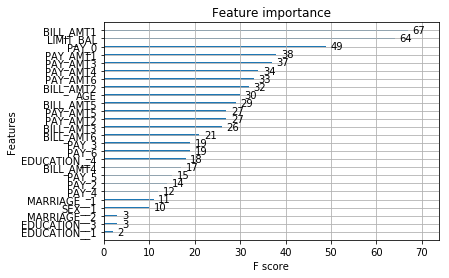

In [107]:
y = F.df['default payment next month']
X = F.df.drop('default payment next month',1)
#y = H.df['default payment next month']
#X = H.df.drop('default payment next month',1)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 
from xgboost import plot_importance

scores = []
count=0
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = XGBClassifier(learning_rate = 0.1,
                      n_estimators=100,
                      max_depth=3,
                      min_child_weight=3,
                      gamma=1.0,
                      reg_alpha=0.05,
                      colsample_bytree=1.0,
                      objective='binary:logistic',
                      scal_pos_weight=1,
                      seed=27)

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)
    count = count + 1
    #print(count)

print(scores)
print(np.mean(scores))
#H has avg accuracy of .8229


#only 20% of people defaulted.
#If we guessed "not default" everytime we'd be about 80% correct so the above results actually kind of suck
1-sum(F.df['default payment next month'])/len(F.df['default payment next month'])
plot_importance(model)

C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\prepro

[0.8286666666666667, 0.8193333333333334, 0.8221666666666667, 0.8321666666666667, 0.8195, 0.823, 0.8145, 0.8186666666666667, 0.8271666666666667, 0.8186666666666667]
0.8223833333333334


C:\Users\e333775\AppData\Local\Continuum\anaconda3_n\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


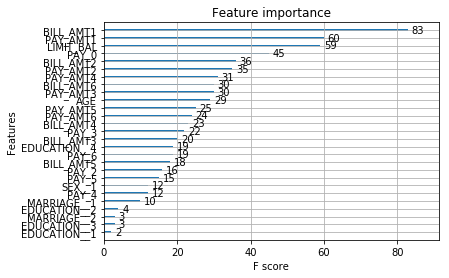

In [108]:
#y = F.df['default payment next month']
#X = F.df.drop('default payment next month',1)
y1 = H.df['default payment next month']
X1 = H.df.drop('default payment next month',1)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt 
from xgboost import plot_importance

scores1 = []
count=0
for i in range(0,10):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=i)
    model1 = XGBClassifier(learning_rate = 0.1,
                      n_estimators=100,
                      max_depth=3,
                      min_child_weight=3,
                      gamma=1.0,
                      reg_alpha=0.05,
                      colsample_bytree=1.0,
                      objective='binary:logistic',
                      scal_pos_weight=1,
                      seed=27)

    model1.fit(X_train1,y_train1)
    y_pred1 = model1.predict(X_test1)

    accuracy1 = accuracy_score(y_test1, y_pred1)
    scores1.append(accuracy1)
    count = count + 1
    #print(count)

print(scores1)
print(np.mean(scores1))
#H has avg accuracy of .8229


#only 20% of people defaulted.
#If we guessed "not default" everytime we'd be about 80% correct so the above results actually kind of suck
1-sum(F.df['default payment next month'])/len(F.df['default payment next month'])
plot_importance(model1)

In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth=2,random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("{}. feature {} ({})".format(X_train.columns[indices[f]],indices[f],importances[indices[f]]))

0.8016666666666666
PAY_0. feature 2 (0.3109949460822882)
PAY_2. feature 3 (0.18591093012977697)
PAY_5. feature 6 (0.11913981548641299)
PAY_3. feature 4 (0.08759479594422499)
PAY_4. feature 5 (0.08368081192861804)
PAY_6. feature 7 (0.07443068328440477)
PAY_AMT1. feature 14 (0.04224115545671553)
LIMIT_BAL. feature 0 (0.029719043083769846)
PAY_AMT2. feature 15 (0.02207550029069784)
PAY_AMT3. feature 16 (0.015608174852459876)
PAY_AMT4. feature 17 (0.005630237384815342)
PAY_AMT6. feature 19 (0.005090783041770813)
PAY_AMT5. feature 18 (0.0034534081255421655)
BILL_AMT1. feature 8 (0.003344191717858083)
BILL_AMT5. feature 12 (0.0022876975619590028)
BILL_AMT3. feature 10 (0.001980723841002477)
BILL_AMT2. feature 9 (0.001908229906943619)
SEX__1. feature 20 (0.0012882128056525457)
EDUCATION__4. feature 26 (0.001254136870899981)
EDUCATION__1. feature 23 (0.0011987831137838648)
AGE. feature 1 (0.00048245154457384284)
BILL_AMT4. feature 11 (0.00026389094138093904)
SEX__2. feature 21 (0.0002245913984

In [22]:
from sklearn.grid_search import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
param_test1 = {
               'max_depth':[3,7,10],
               'min_child_weight':[1,3,6],
               'gamma':[0,0.5,1.0],
               'colsample_bytree':[0,0.5,1.0],
               'reg_alpha':[0,0.005,0.01,0.05]
              }
#param_test1 = {'max_depth':[10],'min_child_weight':[1],'reg_alpha':[0.05],'gamma':[0.5],'colsample_bytree':[1]}
gsearch1 = GridSearchCV(estimator = model,param_grid = param_test1,scoring='roc_auc',n_jobs=4,iid=False,cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_,gsearch1.best_params_,gsearch1.best_score_

([mean: 0.76568, std: 0.00720, params: {'colsample_bytree': 0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0},
  mean: 0.76587, std: 0.00742, params: {'colsample_bytree': 0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.005},
  mean: 0.76618, std: 0.00757, params: {'colsample_bytree': 0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.01},
  mean: 0.76589, std: 0.00731, params: {'colsample_bytree': 0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0.05},
  mean: 0.76480, std: 0.00666, params: {'colsample_bytree': 0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0},
  mean: 0.76518, std: 0.00697, params: {'colsample_bytree': 0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.005},
  mean: 0.76449, std: 0.00712, params: {'colsample_bytree': 0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 3, 'reg_alpha': 0.01},
  mean: 0.76524, std: 0.00672, params: {'colsample_bytree': 0, 'ga

In [17]:
#things to do
    #try messing around with the order of the data cleaning functions
    #try creating new columns that may have predictive value based on data we have
    #try gridsearchcv to optimize parameters of XGBoost
    #Run on more than 2 trials for each different dataset w/ gridsearch to see which performs the best
    #figure out how to define the normalization data cleaning method
    #ask Tao about other shit we could do

In [ ]:
###Testing scripts for skew handling/normlization


file=pd.read_excel('default_of_credit_card_clients.xlsx',header=1)

#Find skewness of columns
for col in range(6,24):
    #Need to set negative values to 0 for square roots to work
    file.iloc[:, col][file.iloc[:, col]<0]=0
    if abs(scipy.stats.skew(file.iloc[:,col]))<=.5:
        print(mean.columns[col],scipy.stats.skew(mean.iloc[:,col]),' - Symmetrical')
        pass
    elif scipy.stats.skew(file.iloc[:,col])<(-.5) and scipy.stats.skew(file.iloc[:,col]) >=(-1):
        print(file.columns[col],scipy.stats.skew(file.iloc[:,col]),' - Moderately Negatively Skewed')
    elif scipy.stats.skew(file.iloc[:,col])>.5 and scipy.stats.skew(file.iloc[:,col]) <1:
        print(file.columns[col],scipy.stats.skew(file.iloc[:,col]),' - Moderately Positively Skewed')
    elif scipy.stats.skew(file.iloc[:,col])<-1:
        print(file.columns[col],scipy.stats.skew(file.iloc[:,col]),' - Highly Negatively Skewed')
    elif scipy.stats.skew(file.iloc[:,col])>1:
        print(file.columns[col],scipy.stats.skew(file.iloc[:,col]),' - Highly Positively Skewed')
        

#Different methods for handling positive skewness - none seem to be bringing it down enough
print(abs(scipy.stats.skew(np.sqrt(file['PAY_0']))))
print(abs(scipy.stats.skew(np.cbrt(file['PAY_0']))))
print(abs(scipy.stats.skew(np.log(file['PAY_0']+.0001))))
print(abs(scipy.stats.skew(1/(file['PAY_0']+.0001))))


#Function to automatically test different skew handling techniques and choose the one that minimizes skew
#for col in range(6,24):
#    minvalue=min(abs(scipy.stats.skew(np.sqrt(file[col]))),abs(scipy.stats.skew(np.cbrt(file[col]))),abs(scipy.stats.skew(np.log(file[col]))))
#    if minvalue==abs(scipy.stats.skew(np.sqrt(file[col]))):
#        file[col]=np.sqrt(file[col])
#    elif minvalue==abs(scipy.stats.skew(np.cbrt(file[col]))):
#        file[col]=np.cbrt(file[col])
#    elif minvalue==abs(scipy.stats.skew(np.log(file[col]))):
#        file[col]=np.log(file[col])